In [1]:
from matplotlib import pyplot as plt
from sympy import Symbol, Abs
import numpy as np

from ofex.classical_algorithms.filter_functions import gaussian_function_fourier
from ofex.classical_algorithms.filter_functions.gaussian import gaussian_function_cheby
from ofex.classical_algorithms.funcapprox import plot_functions

from filter_state.utils_filter_general import filter_func_eval, max_amplitude

side_fluctuation = 0.011878833380012912
spectral_gap = 0.006206875148932034
gnd_energy = -0.41312846182916174
period = 2

center = gnd_energy - spectral_gap * 1.5
width = spectral_gap * 1.5
n_fourier = int(np.ceil(2 * period * np.log(side_fluctuation ** -1) / (np.pi * width)))
n_poly = 2 * int(np.ceil(np.sqrt(2 * np.log(4/side_fluctuation) * \
                             max(np.e**2 * np.log(1/side_fluctuation) / (2 * width ** 2),
                                 np.log(2/side_fluctuation)))))
if n_poly % 2 == 1:
    n_poly += 1

width_rescaled = width / np.sqrt(2 * np.log(side_fluctuation ** -1))
print(n_fourier, n_poly, width_rescaled)

607 2966 0.003126803171911192


In [2]:
x = Symbol("x")
gauss_expr, gauss_coeff, gauss_freqs = gaussian_function_fourier(n_fourier, width_rescaled, center, period, sym_x = x,
                                                                 cutoff_coeff_atol=1e-5)

In [3]:
gauss_poly, gauss_poly_coeff = gaussian_function_cheby(n_poly, width_rescaled, center, period)

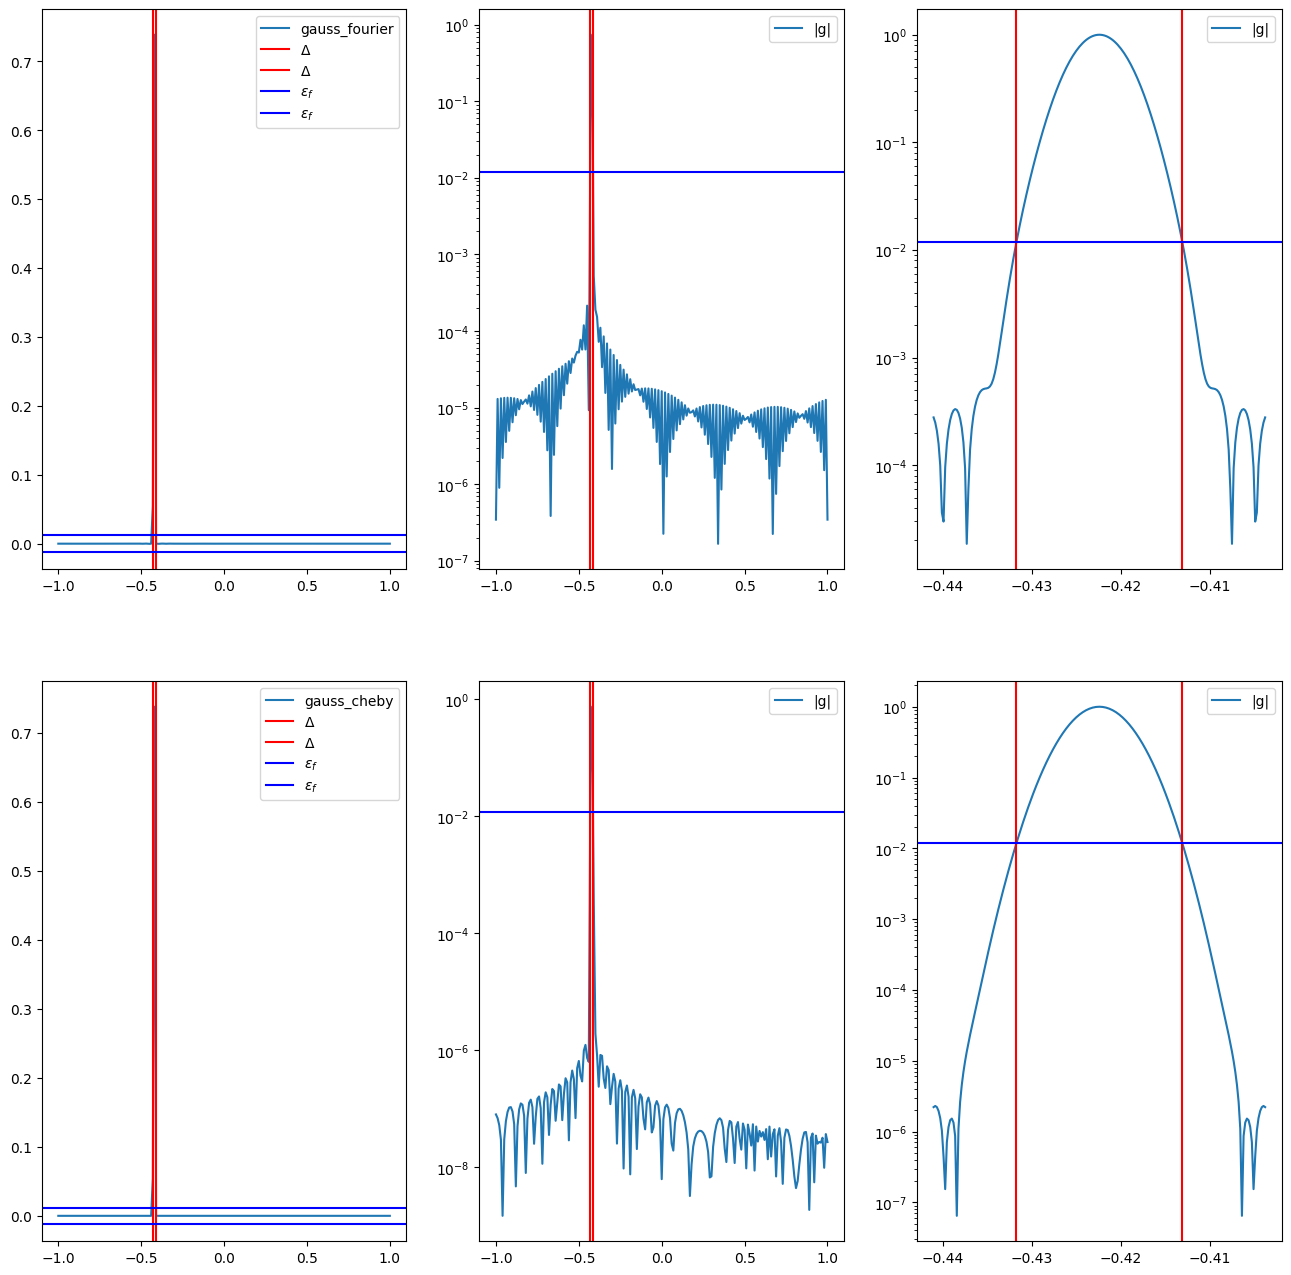

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(16,16))

def abs_gaussian_poly(x):
    return np.abs(gauss_poly(x))

for idx, (func, abs_func, name) in enumerate([(gauss_expr, Abs(gauss_expr), "gauss_fourier"),
                                              (gauss_poly, abs_gaussian_poly, "gauss_cheby")]):
    x_points = np.linspace(-1, 1, 201)
    small_x_points = np.linspace(max(center - 2 * width, -1),
                                 min(center + 2 * width, 1), 201)
    plot_functions({name: func}, x, x_points=x_points, plot=False, axes=ax[idx, 0])
    plot_functions({"|g|": abs_func}, x, x_points=x_points, plot=False, axes=ax[idx, 1])
    plot_functions({"|g|": abs_func}, x, x_points=small_x_points, plot=False, axes=ax[idx, 2])
    for ax_idx in range(3):
        ax[idx, ax_idx].axvline(center-width, color="red", label=r"$\Delta$")
        ax[idx, ax_idx].axvline(center+width, color="red", label=r"$\Delta$")
        ax[idx, ax_idx].axhline(-side_fluctuation, color="blue", label=r"$\epsilon_f$")
        ax[idx, ax_idx].axhline(side_fluctuation, color="blue", label=r"$\epsilon_f$")

    ax[idx, 0].legend()
    ax[idx, 1].set_yscale('log')
    ax[idx, 2].set_yscale('log')

plt.show()

-0.4532187565204996 10.358368422292916 10.358368422292921


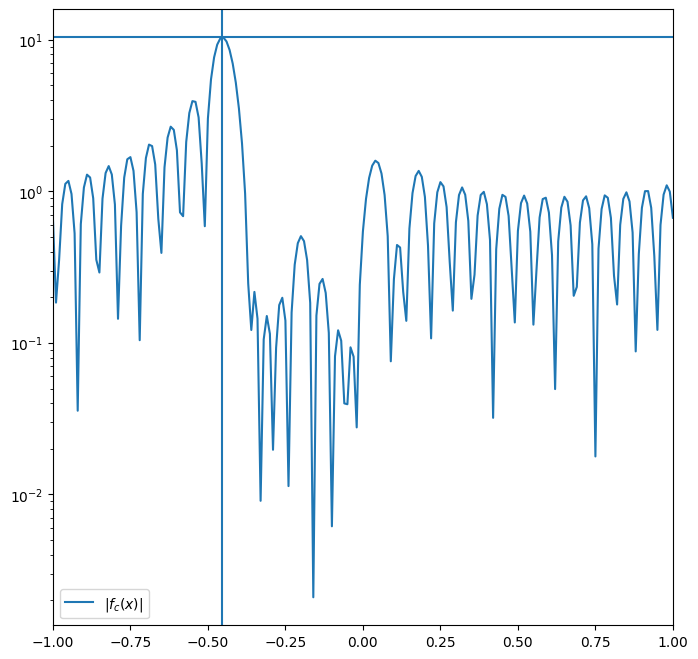

In [8]:
# Manual plots

basis_type = "cheby"
coeff = np.array([(-0.6400203792869844+0j), (0.3405305832947072+0j), (0.334335089307423+0j), (-0.7446880515396076+0j), (0.3334571211262951+0j), (0.5421905843296172+0j), (-0.8161592302763023+0j), (0.10340824440801094+0j), (0.711703729810753+0j), (-0.662487114989167+0j), (-0.09552030459257844+0j), (0.6677576228073556+0j), (-0.5296493596308858+0j), (-0.10431021343417952+0j), (0.63898853306033+0j), (-0.5602039951817495+0j), (-0.1291892928111688+0j), (0.7505367738510673+0j), (-0.5665558843827914+0j), (-0.2800440248260488+0j), (0.8167620941612038+0j), (-0.44019112895661866+0j), (-0.34443082144330206+0j), (0.6925037961802302+0j), (-0.44996753346042623+0j), (-0.06843645160570218+0j), (0.7092731096921953+0j), (-1.0611178706277475+0j), (0.20242188243641437+0j)])

basis_type = "trig"
coeff = np.array([(-0.43043063574800594-0.30102568822590753j), (0.12024794866539869+0.26323678777374093j), (0.39249156549997866-0.13547239679762046j), (-0.04599356995130181-0.3367402194820224j), (-0.2921704488464986+0.0798007281135517j), (0.07588214810662308+0.3431641156245463j), (0.3732797375687715-0.007465990527187925j), (0.07344260655850925-0.3703220656877163j), (-0.32223878362427355-0.14797892987191405j), (-0.15895749871745887+0.2713533741181575j), (0.2939358084995872+0.1875938129379389j), (0.3048915933105923-0.26090398690131616j), (-0.1266935470239177-0.33712530894348486j), (-0.282124795971985+0.09456539782359251j), (0.10812424942582172+0.3530791219493151j), (0.42923844994707155+0.038354613892737116j), (0.16901030807802525-0.3283157556924834j), (-0.2608894085890251-0.14308644749947072j), (-0.18445690501671133+0.30932245146326487j), (0.2538046170465158+0.3108263026430405j), (0.3225385799980502-0.1325087264359811j), (-0.1083298140725624-0.2952368395427835j), (-0.3433696749339494+0.08850346714401221j), (0.006623059171013727+0.37747633552981147j), (0.3660425038084818+0.07352815040215185j), (0.13552111516836565-0.3242741710291563j), (-0.27339361112378346-0.1303367207551928j), (-0.10496711513412599+0.32325112317677807j), (0.36225514568227224+0.20291281061579716j), (0.16501339182430594-0.2377472525894711j), (-0.4769818806916744+0.21994381704024635j)])


x_max, max_amp = max_amplitude(basis_type, coeff)
max_amp_1 = np.abs(filter_func_eval(basis_type, x_max, coeff.conj()))

print(x_max, max_amp, max_amp_1)
coeff = coeff.conj()

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.axhline(max_amp_1)
ax.axvline(x_max)

x_points = np.linspace(-1, 1, 201)
y_points = np.abs(filter_func_eval(basis_type, x_points, coeff))

ax.plot(x_points, y_points, label=r"$|f_c(x)|$")
ax.legend()
ax.set_yscale('log')
ax.set_xlim(-1.0, 1.0)

plt.show()